# EDA - Documents Administratifs

Ce notebook présente une analyse exploratoire des données relatives aux documents administratifs (`documents_administratifs_ext.csv`).
L'objectif est de comprendre la structure des données, la qualité, et de dégager des tendances sur les demandes, les délais et les taux de rejet.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# Chargement du dataset
df_doc = pd.read_csv('../../data_raw/documents_administratifs_ext.csv')

# Affichage des premières lignes
df_doc.head()

,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
0,2023,1,Maritime,Vo,Lomé,Carte d'identité,2450,12.5,0.05
1,2023,1,Maritime,Vo,Lomé,Passeport,1650,25.2,0.08
2,2023,1,Maritime,Vo,Lomé,Acte de naissance,890,10.1,0.02
3,2023,1,Maritime,Vo,Lomé,Livre de famille,620,15.3,0.03
4,2023,1,Maritime,Lacs,Aného,Carte d'identité,1250,14.5,0.04


In [6]:
# Aperçu des données
#display(df_doc.head())
print(df_doc.info())
display(df_doc.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   annee              64 non-null     int64  
 1   mois               64 non-null     int64  
 2   region             64 non-null     object 
 3   prefecture         64 non-null     object 
 4   commune            64 non-null     object 
 5   type_document      64 non-null     object 
 6   nombre_demandes    64 non-null     int64  
 7   delai_moyen_jours  64 non-null     float64
 8   taux_rejet_moyen   64 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.6+ KB
None


,annee,mois,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2023.312500,1.625000,755.312500,19.168750,0.064062
std,0.467177,0.934353,606.119504,6.847219,0.028659
min,2023.000000,1.000000,160.000000,9.200000,0.020000
25%,2023.000000,1.000000,310.000000,14.075000,0.040000
50%,2023.000000,1.000000,575.000000,17.400000,0.060000
75%,2024.000000,3.000000,927.500000,22.475000,0.080000
max,2024.000000,3.000000,2700.000000,34.500000,0.130000


## Vérification de la qualité des données

In [7]:
# Vérification des valeurs manquantes
missing_values = df_doc.isnull().sum()
print("valeurs manquantes :\n", missing_values[missing_values > 0])

# Vérification des doublons
duplicates = df_doc.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")

valeurs manquantes :
 Series([], dtype: int64)

Nombre de doublons : 0


In [16]:
#nombre total de demandes 
print("Il y a au total : " + str(df_doc["nombre_demandes"].sum()))

Il y a au total : 48340 par an 


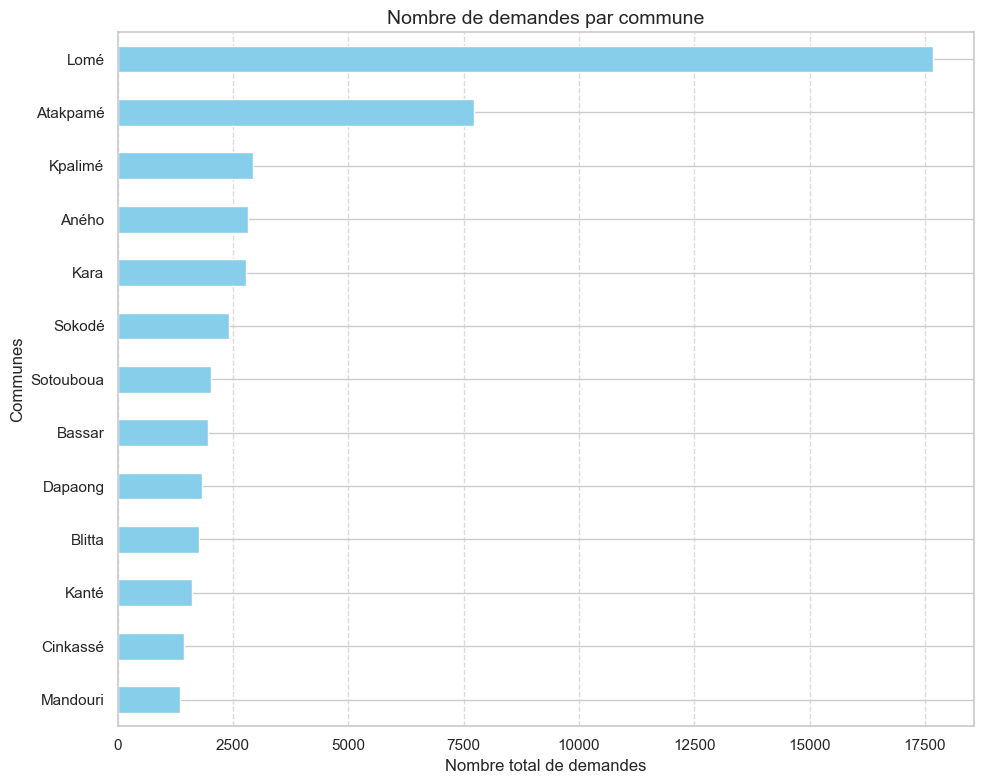

In [8]:


# 1. Préparation des données (Somme des demandes par commune)
# On trie pour avoir un graphique ordonné
data_plot = df_doc.groupby('commune')['nombre_demandes'].sum().sort_values(ascending=True)

# 2. Création du graphique
plt.figure(figsize=(10, 8)) # Taille adaptée pour lire les noms de communes
data_plot.plot(kind='barh', color='skyblue') # barh pour des barres horizontales (plus lisible)

# 3. Personnalisation
plt.title('Nombre de demandes par commune', fontsize=14)
plt.xlabel('Nombre total de demandes')
plt.ylabel('Communes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 4. Affichage
plt.tight_layout()
plt.show()



## Analyse Univariée

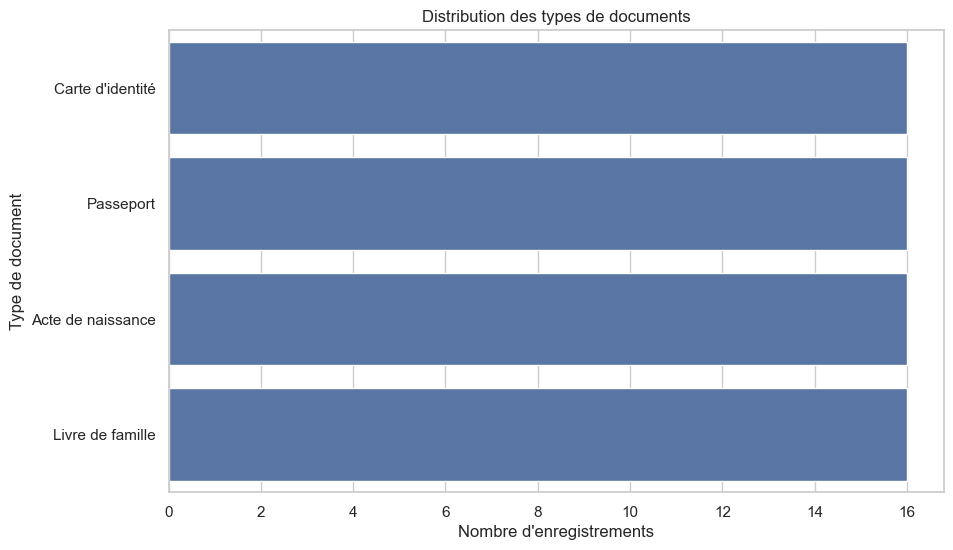

In [9]:
# Distribution des types de documents
plt.figure(figsize=(10, 6))
sns.countplot(data=df_doc, y='type_document', order=df_doc['type_document'].value_counts().index)
plt.title('Distribution des types de documents')
plt.xlabel('Nombre d\'enregistrements')
plt.ylabel('Type de document')
plt.show()

   annee  mois  nombre_demandes periode
0   2023     1            18840  1/2023
1   2023     3            15290  3/2023
2   2024     1            14210  1/2024


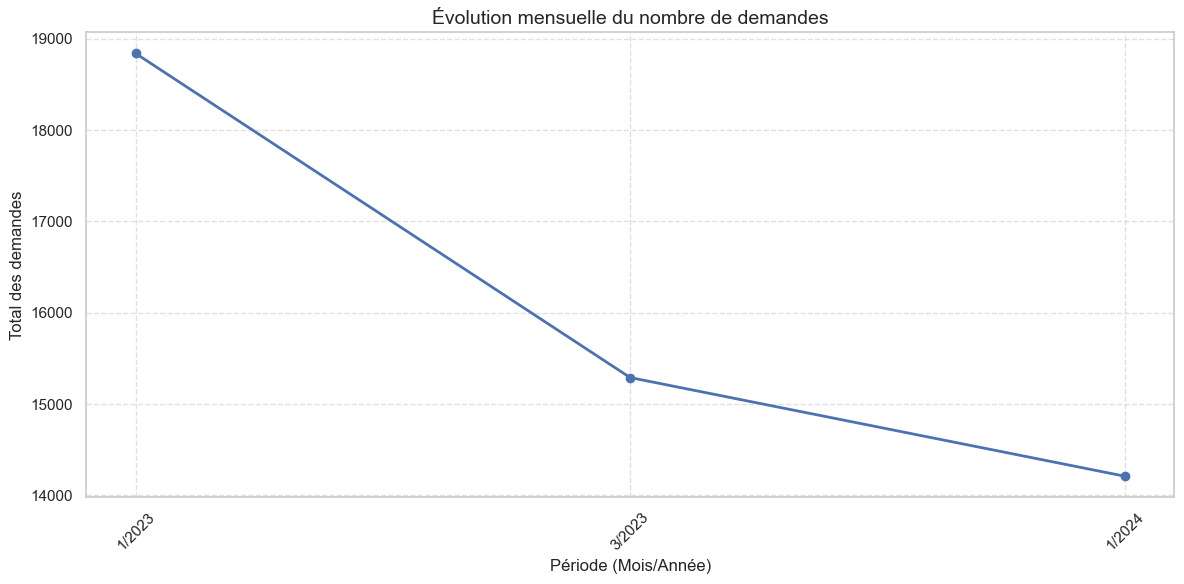

In [17]:
# Grouper par année et mois et faire la somme
evol_temp = df_doc.groupby(['annee', 'mois'])['nombre_demandes'].sum().reset_index()

# Créer une étiquette de texte "Mois-Année" pour l'axe X
evol_temp['periode'] = evol_temp['mois'].astype(str) + "/" + evol_temp['annee'].astype(str)

# Affichage
print(evol_temp)
plt.figure(figsize=(12, 6))

# Tracer la ligne
plt.plot(evol_temp['periode'], evol_temp['nombre_demandes'], marker='o', linestyle='-', color='b', linewidth=2)

# Personnalisation
plt.title('Évolution mensuelle du nombre de demandes', fontsize=14)
plt.xlabel('Période (Mois/Année)')
plt.ylabel('Total des demandes')
plt.xticks(rotation=45) # Pivoter les dates pour plus de lisibilité
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

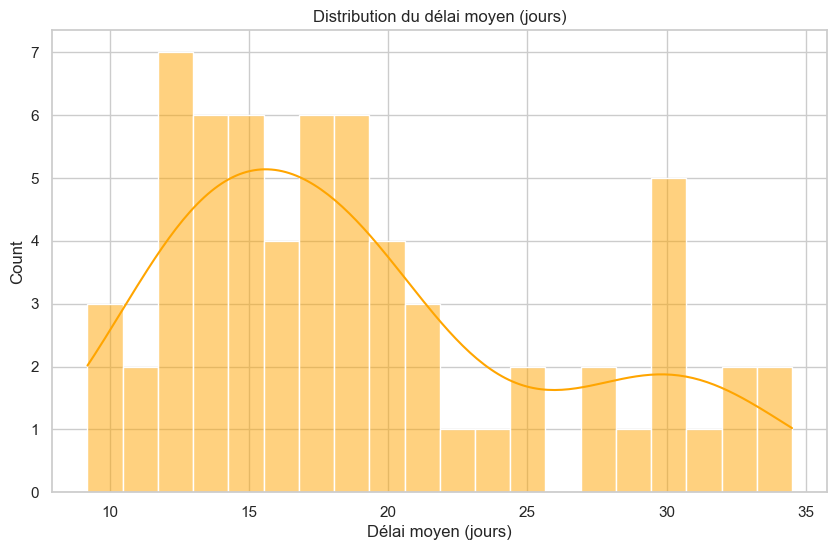

In [9]:
# Distribution des délais moyens

plt.figure(figsize=(10, 6))
sns.histplot(df_doc['delai_moyen_jours'], kde=True, bins=20, color='orange')
plt.title('Distribution du délai moyen (jours)')
plt.xlabel('Délai moyen (jours)')
plt.show()

## Analyse Bivariée

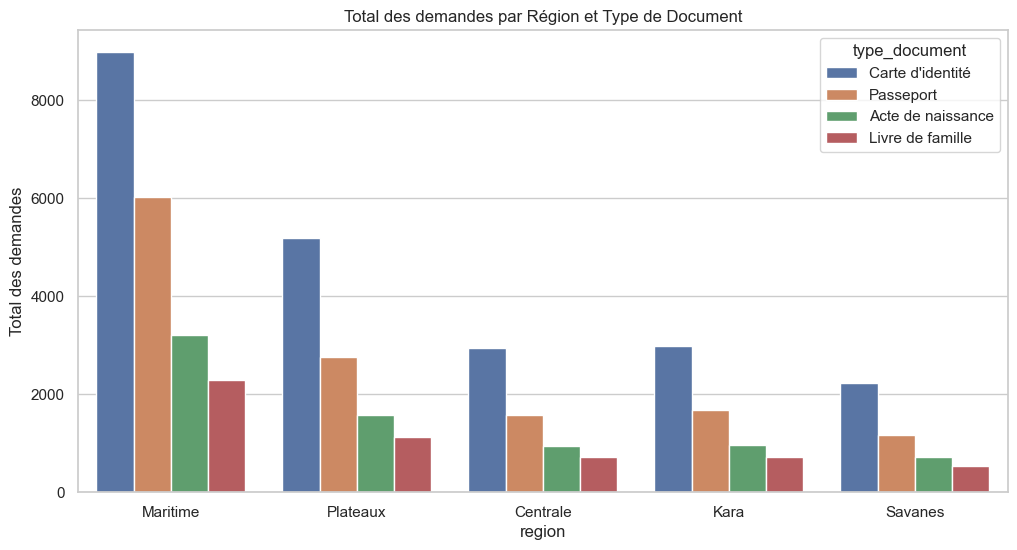

In [10]:
# Nombre de demandes par Région et Type de Document
plt.figure(figsize=(12, 6))
sns.barplot(data=df_doc, x='region', y='nombre_demandes', hue='type_document', estimator=sum, errorbar=None)
plt.title('Total des demandes par Région et Type de Document')
plt.ylabel('Total des demandes')
plt.show()

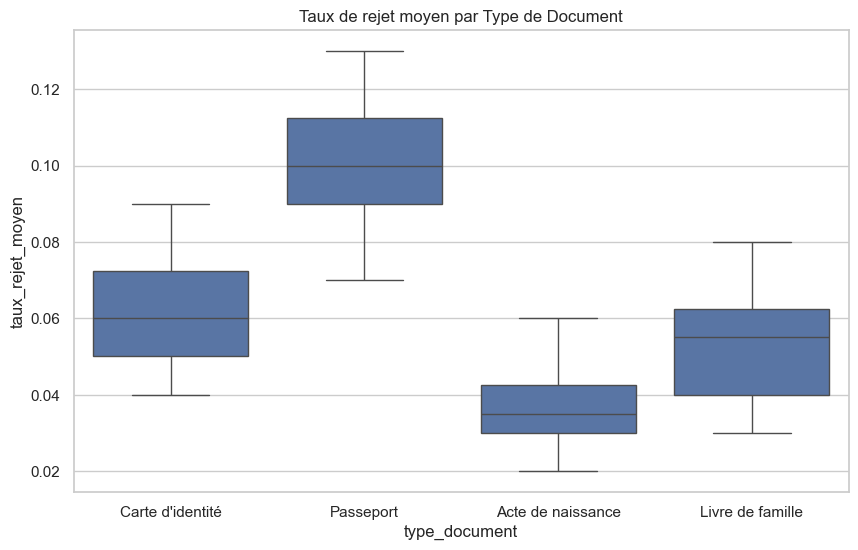

In [11]:
# Taux de rejet par Type de Document
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_doc, x='type_document', y='taux_rejet_moyen')
plt.title('Taux de rejet moyen par Type de Document')
plt.show()

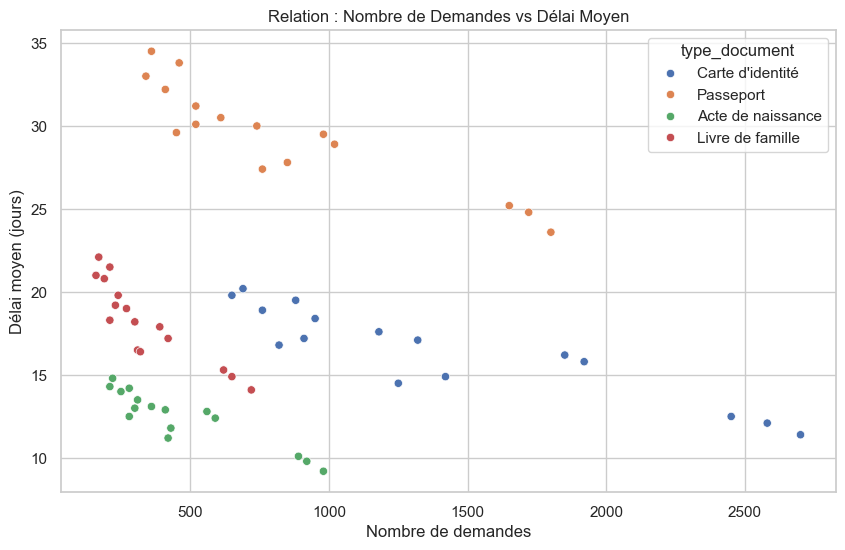

In [12]:
# Relation entre Délai Moyen et Nombre de Demandes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_doc, x='nombre_demandes', y='delai_moyen_jours', hue='type_document')
plt.title('Relation : Nombre de Demandes vs Délai Moyen')
plt.xlabel('Nombre de demandes')
plt.ylabel('Délai moyen (jours)')
plt.show()

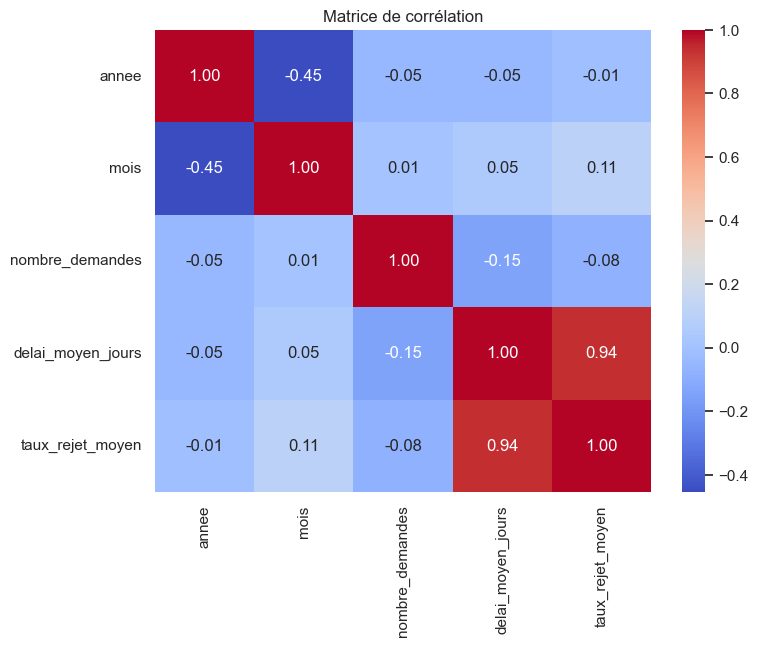

In [36]:
# Corrélation entre les variables numériques
numeric_cols = df_doc.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_doc[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [21]:
import os 
import sys 

# 1. Ajout du chemin au système
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)

# 2. Import
from clean_document_admin import clean_demandes_data

# 3. Appel avec le paramètre correct (input_path)
# La fonction va charger le CSV, le nettoyer et vous retourner le DataFrame
display(df_doc.head() )              
df_cleaned = clean_demandes_data(df_doc)
print(df_cleaned.head())
df_cleaned.drop(df_cleaned['nothing_colon'])
# 4. Vérification rapide
if df_cleaned is not None:
    print(f"Nettoyage réussi ! Nombre de lignes : {len(df_cleaned)}")
    #save to 
    df_cleaned.to_csv("../../02_Nettoyage_et_Preparation_des_Donnees/data_cleaned/document_administratif_ext_cleaned.csv")
else :
    print('soucis de chemin de ficher ?')


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
0,2023,1,Maritime,Vo,Lomé,Carte d'identité,2450,12.5,0.05
1,2023,1,Maritime,Vo,Lomé,Passeport,1650,25.2,0.08
2,2023,1,Maritime,Vo,Lomé,Acte de naissance,890,10.1,0.02
3,2023,1,Maritime,Vo,Lomé,Livre de famille,620,15.3,0.03
4,2023,1,Maritime,Lacs,Aného,Carte d'identité,1250,14.5,0.04


   annee  mois    region prefecture commune      type_document  \
0   2023     1  Maritime         Vo    Lomé   Carte d'identité   
1   2023     1  Maritime         Vo    Lomé          Passeport   
2   2023     1  Maritime         Vo    Lomé  Acte de naissance   
3   2023     1  Maritime         Vo    Lomé   Livre de famille   
4   2023     1  Maritime       Lacs   Aného   Carte d'identité   

   nombre_demandes  delai_moyen_jours  taux_rejet_moyen mois_nom  \
0             2450               12.5              0.05  Janvier   
1             1650               25.2              0.08  Janvier   
2              890               10.1              0.02  Janvier   
3              620               15.3              0.03  Janvier   
4             1250               14.5              0.04  Janvier   

   nothing_colon       periode  
0              3  Janvier 2023  
1              3  Janvier 2023  
2              3  Janvier 2023  
3              3  Janvier 2023  
4              3  Janvier 202